# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Оглавление

<a name="All"></a>

* [Шаг 1. Общая информация](#Step1)
* [Шаг 2. Предобработка данных](#Step2)
* [Шаг 3. Добавление дополнительных значений](#Step3)
* [Шаг 4. Исследовательский анализ данных](#Step4)
* [Шаг 5. Общий вывод](#Step5)
* [Чек-лист](#Step5)


### <a name="Step1"></a> Шаг 1. Откройте файл с данными и изучите общую информацию.  

[Наверх](#All)

In [1]:
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

In [3]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [4]:
data['locality_name'].value_counts()

Санкт-Петербург                    15721
посёлок Мурино                       522
посёлок Шушары                       440
Всеволожск                           398
Пушкин                               369
                                   ...  
посёлок Платформа 69-й километр        1
поселок Возрождение                    1
поселок Гладкое                        1
поселок Красносельское                 1
коттеджный посёлок Лесное              1
Name: locality_name, Length: 364, dtype: int64

In [5]:
data['is_apartment'].value_counts()

False    2725
True       50
Name: is_apartment, dtype: int64

In [6]:
data['first_day_exposition'].value_counts()

2018-02-01T00:00:00    368
2017-11-10T00:00:00    240
2017-10-13T00:00:00    124
2017-09-27T00:00:00    111
2018-03-26T00:00:00     97
                      ... 
2016-01-06T00:00:00      1
2016-09-29T00:00:00      1
2016-08-09T00:00:00      1
2015-04-19T00:00:00      1
2015-05-05T00:00:00      1
Name: first_day_exposition, Length: 1491, dtype: int64

In [7]:
data['floor'].value_counts()

2     3368
3     3073
1     2917
4     2804
5     2621
6     1305
7     1218
8     1083
9     1051
10     687
12     526
11     523
13     379
15     343
14     337
16     315
17     227
18     178
19     147
21     125
22     113
20     110
23     100
24      63
25      46
26      24
27      10
28       1
33       1
29       1
30       1
32       1
31       1
Name: floor, dtype: int64

In [8]:
data['rooms'].value_counts()

1     8047
2     7940
3     5814
4     1180
5      326
0      197
6      105
7       59
8       12
9        8
10       3
14       2
11       2
19       1
12       1
16       1
15       1
Name: rooms, dtype: int64

In [9]:
data[data['studio'] == True]['rooms'].value_counts()

0    138
1     11
Name: rooms, dtype: int64

In [10]:
data[data['rooms'] == 0]['studio'].value_counts()

True     138
False     59
Name: studio, dtype: int64

In [11]:
data['studio'].value_counts()

False    23550
True       149
Name: studio, dtype: int64

In [12]:
data['balcony'].value_counts()

1.0    4195
0.0    3758
2.0    3659
5.0     304
4.0     183
3.0      81
Name: balcony, dtype: int64

In [13]:
data['floors_total'].value_counts()

5.0     5788
9.0     3761
16.0    1376
12.0    1362
4.0     1200
10.0    1174
25.0    1075
6.0      914
17.0     833
3.0      668
7.0      592
14.0     553
18.0     505
24.0     469
8.0      390
2.0      383
15.0     365
23.0     352
19.0     339
22.0     286
20.0     271
13.0     229
11.0     203
27.0     164
21.0     158
26.0     124
1.0       25
35.0      24
28.0      21
36.0       3
29.0       1
60.0       1
33.0       1
52.0       1
37.0       1
34.0       1
Name: floors_total, dtype: int64

In [14]:
data['open_plan'].value_counts()

False    23632
True        67
Name: open_plan, dtype: int64

In [15]:
data['ceiling_height'].value_counts()

2.50      3515
2.60      1646
2.70      1574
3.00      1112
2.80       993
          ... 
27.50        1
5.00         1
3.59         1
4.80         1
100.00       1
Name: ceiling_height, Length: 183, dtype: int64

In [16]:
data['days_exposition'].max()

1580.0

### Вывод

* *balcony* - поменять тип
* *ceiling_height* - есть ошибочно завышенные значения
* *floors_total* - поменять тип 
* *rooms* - ошибочные записи с 0 комнат
* *first_day_exposition* - поменять тип с ***object*** на ***timestamp***
* *is_apartment* - поменять тип

Пропуски обнаружены в следующих параметрах:
* [x] *ceiling_height*
* [x] *floors_total*
* [x] *living_area*
* [x] *is_apartment*
* [x] *kitchen_area*
* [x] *balcony*
* [x] *locality_name*
* [x] *airports_nearest*
* [x] *cityCenters_nearest*
* [x] *parks_around3000*
* [x] *parks_nearest*
* [x] *ponds_around3000*
* [x] *ponds_nearest*
* [x] *days_exposition* 


### <a name="Step2"></a> Шаг 2. Предобработка данных

[Наверх](#All)

#### 2.1 Обработка пропусков

**ceiling_height** заполним медианным значением, можно впринципе и средним но вытота потолков обычно имеет более-менее круглое значение, а среднее в любом случае будет дробным.|

In [17]:
data['ceiling_height'].median()
data['ceiling_height'].isna().sum()

9195

In [18]:
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())

In [19]:
data['ceiling_height'].isna().sum()

0

Можно было бы попробовать заполнить отсутствующие значения **floors_total** по частоте того или иного последнего этажа который будет ближайшим к этажу записи, но я не могу понять как это сделать применительно к DataFrame. Поэтому просто удалю эти записи.

In [20]:
data[data['floors_total'].isna()]['floor'].value_counts()

4     10
6      9
8      8
12     6
9      5
3      4
21     4
5      4
7      4
11     3
10     3
1      3
13     3
15     3
18     3
19     3
14     2
20     2
2      2
24     2
23     1
17     1
22     1
Name: floor, dtype: int64

In [21]:
data['floors_total'].isna().sum()

86

In [22]:
data = data.dropna(subset=['floors_total'])
data['floors_total'].isna().sum()

0

Столбец **is_apartment** говорит нам о том является ли недвижимость апартаментами или нет. Для отсутствующих значений - скорее всего это не было указано потому что количество апартаментов по рынку минимально и можно заменить отсутствующие значния нулями.

In [23]:
data['is_apartment'].isna().sum()

20838

In [24]:
data['is_apartment'] = data['is_apartment'].fillna(0)
data['is_apartment'].isna().sum()

0

**living_area** - у нас есть признак **total_area** и можно посчитать среднее отношение **living_area** к **total_area** в тех записях где признак **living_area** заполнен и затем подставить его вместо незаполненных значений.

In [25]:
living_mean = ((  data[data['living_area'].notna()]['living_area']
                / data[data['living_area'].notna()]['total_area'])
                  .mean())
living_mean

0.5649479605594985

In [26]:
data['living_area'] = data['living_area'].fillna(living_mean*data['total_area'])

In [27]:
data['living_area'].isna().sum()

0

То же самое сделаем и с **kitchen_area**.

In [28]:
kitchen_mean = ((  data[data['kitchen_area'].notna()]['kitchen_area']
                 / data[data['kitchen_area'].notna()]['total_area'])
                  .mean())
kitchen_mean

0.18732402442071253

In [29]:
data['kitchen_area'] = data['kitchen_area'].fillna(kitchen_mean*data['total_area'])

In [30]:
data['kitchen_area'].isna().sum()

0

Не указанные балконы **balcony** скорее всего отсутствуют, поэтому заменим их на 0

In [31]:
data['balcony'] = data['balcony'].fillna(0)
data['balcony'].isna().sum()

0

Еще у нас есть немного пропущенных значений **locality_name**, варианта два - либо удалить их как незначащие, либо поробовать заполнить, после изучения через ручной поиск похожих значений **cityCenters_nearest**(потому что толком не придумал как сделать это в цикле или на DataFrame) понял что большинство из них принадлежит населенному пункту *Санкт-Петербург*, который к тому же является основным для большинства обьявлений. Поэтому заполняем пропущенные значения им.

In [32]:
data['locality_name'].value_counts()

Санкт-Петербург                    15651
посёлок Мурино                       520
посёлок Шушары                       439
Всеволожск                           398
Пушкин                               369
                                   ...  
посёлок Платформа 69-й километр        1
поселок Возрождение                    1
поселок Гладкое                        1
поселок Красносельское                 1
коттеджный посёлок Лесное              1
Name: locality_name, Length: 364, dtype: int64

In [33]:
data['locality_name'] = data['locality_name'].fillna('Санкт-Петербург')
data['locality_name'].isna().sum()

0

Для следующих значений:
* *airports_nearest*
* *cityCenters_nearest*
* *parks_around3000*
* *parks_nearest*
* *ponds_around3000*
* *ponds_nearest*

Эти данные получены на основе картографических данныч и думаю имеет смысл запросить дополнительные данные у коллег которые этими даными занимаются.

**days_exposition** заполнять смысла не имеет потому что, судя по всему эти пропуски обусловлены тем что на время получения данных эти объявления были еще актуальны.

#### 2.2 Замена типа

In [34]:
data['balcony'] = data['balcony'].astype('int64')
data['balcony']

0        0
1        2
2        0
3        0
4        0
        ..
23694    0
23695    0
23696    0
23697    2
23698    0
Name: balcony, Length: 23613, dtype: int64

Балконы - целая величина.

In [35]:
data['floors_total'] = data['floors_total'].astype('int64')
data['floors_total'].value_counts()

5     5788
9     3761
16    1376
12    1362
4     1200
10    1174
25    1075
6      914
17     833
3      668
7      592
14     553
18     505
24     469
8      390
2      383
15     365
23     352
19     339
22     286
20     271
13     229
11     203
27     164
21     158
26     124
1       25
35      24
28      21
36       3
29       1
37       1
34       1
60       1
33       1
52       1
Name: floors_total, dtype: int64

Этажи - тоже целая величина.

In [36]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
data['first_day_exposition']

0       2019-03-07
1       2018-12-04
2       2015-08-20
3       2015-07-24
4       2018-06-19
           ...    
23694   2017-03-21
23695   2018-01-15
23696   2018-02-11
23697   2017-03-28
23698   2017-07-21
Name: first_day_exposition, Length: 23613, dtype: datetime64[ns]

Дату переводим в соответствующий тип.

In [37]:
data['is_apartment'] = data['is_apartment'].astype('bool')
data['is_apartment'].value_counts()

False    23563
True        50
Name: is_apartment, dtype: int64

Параметр явно имеет логический тип.

**Вывод:** проведено заполнение большинства пропусков, проведена замена типа.

### <a name="Step3"></a> Шаг 3. Посчитайте и добавьте в таблицу

* цену квадратного метра;
* день недели, месяц и год публикации объявления;
* этаж квартиры; варианты — первый, последний, другой;
* соотношение жилой и общей площади, а также отношение площади кухни к общей.



[Наверх](#All)

In [38]:
data['price_per_metr'] = (data['last_price']/data['total_area']).astype('int64')
data['price_per_metr']

0        120370
1         82920
2         92785
3        408176
4        100000
          ...  
23694     72490
23695     52542
23696     44091
23697    149511
23698     41795
Name: price_per_metr, Length: 23613, dtype: int64

In [39]:
data['day'] = data['first_day_exposition'].map(datetime.datetime.weekday)
data['day'].value_counts()

3    4285
1    4170
4    3988
2    3956
0    3602
5    1922
6    1690
Name: day, dtype: int64

In [40]:
data['month'] = pd.DatetimeIndex(data['first_day_exposition']).month
data['month'].value_counts()

2     2637
3     2580
11    2364
4     2362
10    2111
9     1974
6     1752
8     1741
7     1690
12    1641
1     1496
5     1265
Name: month, dtype: int64

In [41]:
data['year'] = pd.DatetimeIndex(data['first_day_exposition']).year
data['year'].value_counts()

2018    8492
2017    8166
2019    2871
2016    2763
2015    1184
2014     137
Name: year, dtype: int64

In [42]:
def f_l_floor(df):
    floors_total = df[0]
    floor = df[1]
    if floor == 1:
        return 'первый'
    elif floor == floors_total:
        return 'последний'
    else:
        return 'другой'

data['first_last_floor'] = data[['floors_total','floor']].apply(f_l_floor, axis=1)
data['first_last_floor'].value_counts()

другой       17363
последний     3336
первый        2914
Name: first_last_floor, dtype: int64

In [43]:
data['living_total'] = data['living_area']/data['total_area']

In [44]:
data['kitchen_total'] = data['kitchen_area']/data['total_area']

**Вывод:** добавлены столбцы для цены квадратного метра, для дня, месяца и года первой публикации, добавлен столбец для определения крайних этажей и высчитаны соотношения жилой и кухонной площадей к общей.

### <a name="Step4"></a> Шаг 4. Проведите исследовательский анализ данных и выполните инструкции:

[Наверх](#All)

1. Изучите следующие параметры: площадь, цена, число комнат, высота потолков. Постройте гистограммы для каждого параметра.
2. Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?
3. Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили.
4. Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от площади, числа комнат, удалённости от центра. Изучите зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. Также изучите зависимость от даты размещения: дня недели, месяца и года.
5. Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите среди них населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце 'locality_name'.
6. Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге ('locality_name'). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона.
7. Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?

#### 4.1 Изучите следующие параметры: площадь, цена, число комнат, высота потолков. Постройте гистограммы для каждого параметра.

Гистограмма для общей площади:

In [45]:
def histogr(a,x,y,podp):
    Q1 = a.quantile(0.25)
    Q3 = a.quantile(0.75)
    IQR = Q3 - Q1
    b = Q1-3*IQR
    c = Q3+4*IQR
    a.hist(range=[b,c],bins=30)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title(podp)
    plt.show();

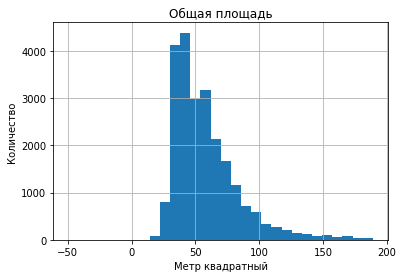

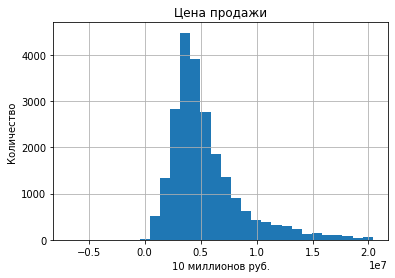

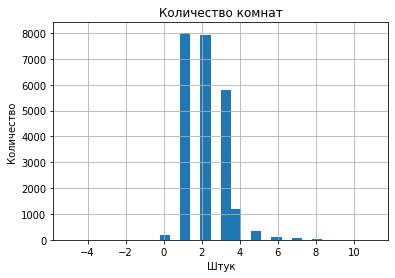

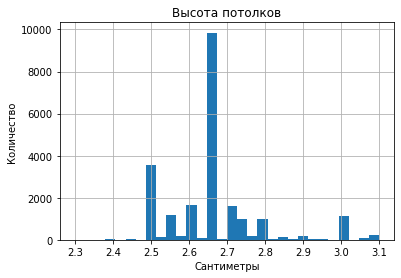

In [46]:
histogr(data['total_area'],'Метр квадратный','Количество','Общая площадь')
histogr(data['last_price'],'10 миллионов руб.','Количество','Цена продажи')
histogr(data['rooms'],'Штук','Количество','Количество комнат')
histogr(data['ceiling_height'],'Сантиметры','Количество','Высота потолков')

Вывод: Большинство однокомнатных и двухкомнатных квартир от 30 до 50 метров с высотой потолков 265 сантиметров и ценой в районе 2,5 - 6 млн. рублей

#### 4.2 Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?



In [47]:
data_sold = data[data['days_exposition'].notna()]

In [48]:
data_sold['days_exposition']

1         81.0
2        558.0
3        424.0
4        121.0
5         55.0
         ...  
23691    519.0
23692    413.0
23693    239.0
23695     45.0
23697    602.0
Name: days_exposition, Length: 20441, dtype: float64

In [49]:
data_sold['days_exposition'] = data_sold['days_exposition'].astype('int64')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [50]:
data_sold['days_exposition']

1         81
2        558
3        424
4        121
5         55
        ... 
23691    519
23692    413
23693    239
23695     45
23697    602
Name: days_exposition, Length: 20441, dtype: int64

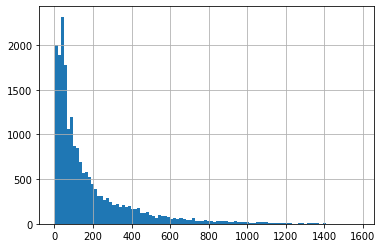

In [51]:
data_sold['days_exposition'].hist(bins=100)

In [52]:
data_sold['days_exposition'].mean()

180.88483929357665

In [53]:
data_sold['days_exposition'].median()

95.0

In [54]:
data_sold['days_exposition'].min()

1

In [55]:
data_sold['days_exposition'].max()

1580

Большинство квартир если смотреть на гистограмму продалось в срок до примерно 200 дней, среднее - 180 дней, медианное значение 95 дней.
Необычайно быстрая продажа - это когда обьявление было снято на следующий день. Хотя возможно в этом случае обьявление могли просто снять. Самое долгое расположение объявления - 1580 дней, почти 4,5 года.

#### 4.3 Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили.

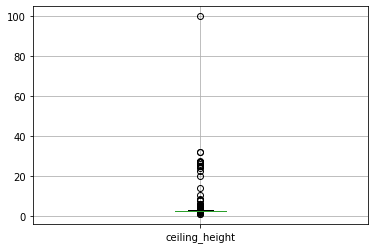

In [56]:
data.boxplot(column=['ceiling_height'])

In [57]:
data.loc[data['ceiling_height'] >= 7, 'ceiling_height'] = 2.65
data.loc[data['ceiling_height'] <= 2.20 , 'ceiling_height'] = 2.65

Обрезаем потолки с высотой больше или равно 7, потолки высотой 6 метров я могу допустить что существуют в каких-нибудь двухярусных квартирах типа лофт или коттеджах. Заменяем значение на медианное.

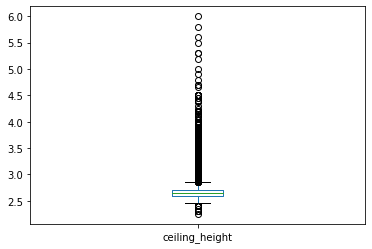

In [58]:
data['ceiling_height'].plot(kind='box')

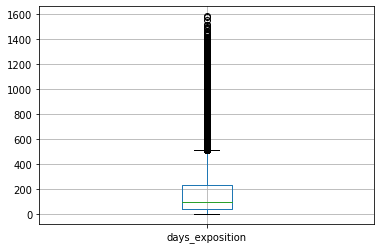

In [59]:
data.boxplot(column=['days_exposition'])

In [60]:
data[data['days_exposition'] >= 1400]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_per_metr,day,month,year,first_last_floor,living_total,kitchen_total
521,20,25717300.0,230.10,2015-01-21,3,2.65,3,130.000000,1,False,...,3.0,278.0,1441.0,111765,2,1,2015,первый,0.564972,0.113429
1109,1,34878556.0,95.80,2014-12-09,2,2.65,6,58.300000,5,True,...,3.0,569.0,1572.0,364076,1,12,2014,другой,0.608559,0.208768
1885,2,13300000.0,79.60,2014-12-09,2,3.00,8,42.700000,7,False,...,0.0,NaN,1513.0,167085,1,12,2014,другой,0.536432,0.226131
2941,3,10090000.0,71.90,2015-02-02,2,2.65,10,34.100000,9,False,...,1.0,434.0,1458.0,140333,0,2,2015,другой,0.474270,0.233658
4736,11,6650000.0,68.30,2015-02-19,4,2.63,5,45.100000,4,False,...,3.0,453.0,1477.0,97364,3,2,2015,другой,0.660322,0.131772
6006,4,4400000.0,38.63,2015-02-03,1,2.85,25,15.000000,6,False,...,0.0,NaN,1452.0,113901,1,2,2015,другой,0.388299,0.318405
6691,3,4400000.0,42.98,2014-12-12,1,2.65,5,18.720000,1,False,...,3.0,232.0,1512.0,102373,4,12,2014,первый,0.435551,0.263146
6726,6,11995000.0,83.82,2014-11-27,2,2.73,11,42.310000,1,False,...,3.0,303.0,1406.0,143104,3,11,2014,первый,0.504772,0.212956
9553,11,10600000.0,80.00,2014-12-09,3,2.85,17,44.000000,9,False,...,0.0,NaN,1553.0,132500,1,12,2014,другой,0.550000,0.187500
9555,11,9950000.0,61.20,2015-04-06,2,3.17,7,39.700000,2,False,...,0.0,NaN,1434.0,162581,0,4,2015,другой,0.648693,0.130719


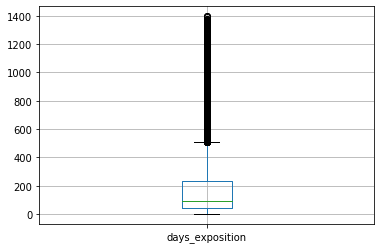

In [61]:
data = data[data['days_exposition'] < 1400]
data.boxplot(column=['days_exposition'])

Убираем значения по срокам размещения обьявления больше чем 1400 дней.

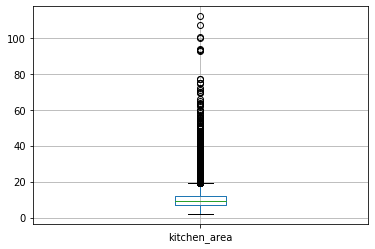

In [62]:
data.boxplot(column=['kitchen_area'])

In [63]:
data[data['kitchen_area'] > 65]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_per_metr,day,month,year,first_last_floor,living_total,kitchen_total
492,18,95000000.0,216.0,2017-12-05,4,3.00,5,86.000000,4,False,...,3.0,620.0,14.0,439814,1,12,2017,другой,0.398148,0.356481
1085,16,75000000.0,323.0,2017-07-10,5,4.00,5,255.700000,4,False,...,2.0,515.0,259.0,232198,0,7,2017,другой,0.791641,0.204334
1388,20,59800000.0,399.0,2015-01-21,5,5.60,6,225.414236,6,False,...,2.0,577.0,719.0,149874,2,1,2015,последний,0.564948,0.187324
2489,9,12500000.0,255.0,2017-04-21,3,2.65,2,153.900000,2,False,...,3.0,198.0,102.0,49019,4,4,2017,последний,0.603529,0.394902
4394,20,57000000.0,174.0,2015-11-09,3,3.20,10,95.000000,6,False,...,3.0,199.0,1039.0,327586,0,11,2015,другой,0.545977,0.442529
5358,20,65000000.0,590.0,2019-02-14,15,3.50,6,409.000000,3,False,...,0.0,NaN,14.0,110169,3,2,2019,другой,0.693220,0.169492
6193,19,24300000.0,230.0,2016-06-03,4,2.65,3,90.000000,2,False,...,1.0,345.0,397.0,105652,4,6,2016,другой,0.391304,0.304348
7674,20,131000000.0,380.0,2016-09-23,5,3.90,6,150.000000,4,False,...,1.0,635.0,901.0,344736,4,9,2016,другой,0.394737,0.187324
9826,1,43185328.0,494.1,2017-05-12,1,2.85,12,279.140787,3,False,...,0.0,NaN,5.0,87401,4,5,2017,другой,0.564948,0.187324
12971,19,763000000.0,400.0,2017-09-30,7,2.65,10,250.000000,10,False,...,3.0,756.0,33.0,1907500,5,9,2017,последний,0.625000,0.187324


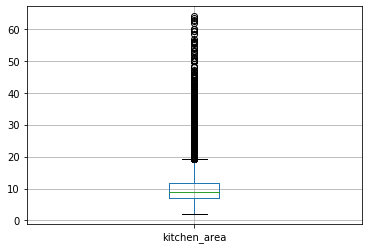

In [64]:
data = data[data['kitchen_area'] < 65]
data.boxplot(column=['kitchen_area'])

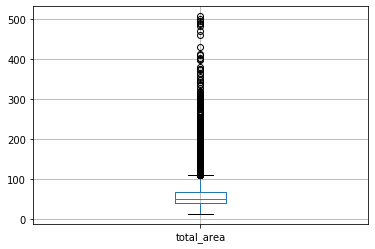

In [65]:
data.boxplot(column=['total_area'])

In [66]:
data[data['total_area'] >= 450]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_per_metr,day,month,year,first_last_floor,living_total,kitchen_total
660,3,49950000.0,483.9,2017-10-04,7,3.20,6,312.50000,4,False,...,3.0,22.0,391.0,103223,2,10,2017,другой,0.645795,0.054557
5893,3,230000000.0,500.0,2017-05-31,6,2.65,7,282.47398,7,False,...,2.0,198.0,50.0,460000,2,5,2017,последний,0.564948,0.080000
6221,8,34000000.0,470.3,2018-01-14,4,2.65,3,248.70000,3,False,...,3.0,122.0,179.0,72294,6,1,2018,последний,0.528811,0.085052
6621,20,99000000.0,488.0,2017-04-09,5,2.95,20,216.00000,17,False,...,1.0,368.0,351.0,202868,6,4,2017,другой,0.442623,0.102459
8018,20,84000000.0,507.0,2015-12-17,5,4.45,7,301.50000,7,True,...,0.0,NaN,1078.0,165680,3,12,2015,последний,0.594675,0.089744
12401,20,91500000.0,495.0,2017-06-19,7,4.65,7,347.50000,7,False,...,0.0,NaN,14.0,184848,0,6,2017,последний,0.702020,0.050505
20273,12,20000000.0,460.8,2019-03-20,6,3.10,3,279.60000,1,False,...,3.0,122.0,21.0,43402,2,3,2019,первый,0.606771,0.120443
22494,7,91075000.0,491.0,2017-05-27,5,4.20,9,274.00000,9,False,...,0.0,NaN,115.0,185488,5,5,2017,последний,0.558045,0.091650


In [67]:
data = data[data['total_area'] <= 450]

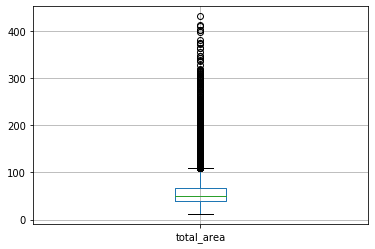

In [68]:
data.boxplot(column=['total_area'])

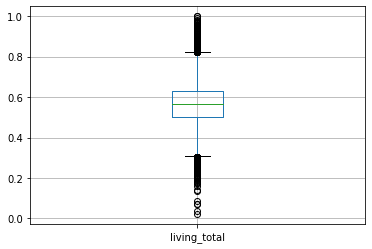

In [69]:
data.boxplot(column=['living_total'])     

In [70]:
data[data['living_total'] < .2]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_per_metr,day,month,year,first_last_floor,living_total,kitchen_total
511,7,5950000.0,69.0,2017-12-21,1,2.65,16,13.0,12,False,...,NaN,NaN,56.0,86231,3,12,2017,другой,0.188406,0.724638
1326,8,8100000.0,52.0,2017-01-29,2,2.70,25,9.0,15,False,...,1.0,1180.0,337.0,155769,6,1,2017,другой,0.173077,0.615385
2309,10,4200000.0,62.4,2017-06-15,2,2.60,9,8.4,6,False,...,0.0,NaN,111.0,67307,3,6,2017,другой,0.134615,0.657051
3242,7,4440000.0,41.0,2017-07-02,1,2.65,17,3.0,17,False,...,0.0,NaN,216.0,108292,6,7,2017,последний,0.073171,0.268293
8325,9,4800000.0,52.0,2017-10-25,2,2.65,5,9.0,2,False,...,2.0,118.0,119.0,92307,2,10,2017,другой,0.173077,0.115385
9471,4,850000.0,78.0,2017-05-04,3,2.65,9,12.5,7,False,...,NaN,NaN,169.0,10897,3,5,2017,другой,0.160256,0.108974
11876,18,3950000.0,57.8,2018-12-17,2,2.50,10,11.5,4,False,...,NaN,NaN,98.0,68339,0,12,2018,другой,0.198962,0.198962
13792,9,4999000.0,85.2,2015-11-02,1,2.65,4,15.7,1,False,...,0.0,NaN,280.0,58673,0,11,2015,первый,0.184272,0.171362
13915,20,6350000.0,52.0,2018-02-06,2,3.00,6,2.0,2,False,...,1.0,1012.0,91.0,122115,1,2,2018,другой,0.038462,0.173077
14991,19,45000000.0,413.5,2018-09-20,7,2.65,20,74.2,18,False,...,0.0,NaN,182.0,108827,3,9,2018,другой,0.179444,0.033615


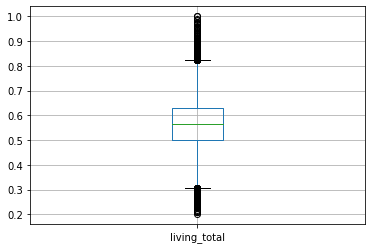

In [71]:
data = data[data['living_total'] > .2]
data.boxplot(column=['living_total'])  

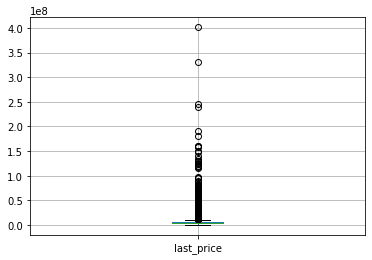

In [72]:
data.boxplot(column=['last_price'])

In [73]:
data[data['last_price'] > 1.75*10**8]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_per_metr,day,month,year,first_last_floor,living_total,kitchen_total
1436,19,330000000.0,190.0,2018-04-04,3,3.50,7,95.0,5,False,...,3.0,285.0,233.0,1736842,2,4,2018,другой,0.500000,0.210526
8900,13,190870000.0,268.0,2016-03-25,3,2.65,8,132.0,7,False,...,2.0,198.0,901.0,712201,4,3,2016,другой,0.492537,0.149254
13749,7,240000000.0,410.0,2017-04-01,6,3.40,7,218.0,7,False,...,2.0,198.0,199.0,585365,5,4,2017,последний,0.531707,0.097561
14706,15,401300000.0,401.0,2016-02-20,5,2.65,9,204.0,9,False,...,1.0,478.0,393.0,1000748,5,2,2016,последний,0.508728,0.059850
16461,17,245000000.0,285.7,2017-04-10,6,3.35,7,182.8,4,False,...,3.0,140.0,249.0,857542,0,4,2017,другой,0.639832,0.104305
19865,20,180000000.0,347.0,2015-01-21,8,3.90,6,260.0,3,False,...,3.0,501.0,834.0,518731,2,1,2015,другой,0.749280,0.129683


In [74]:
data = data[data['last_price'] < 1.75*10**8]

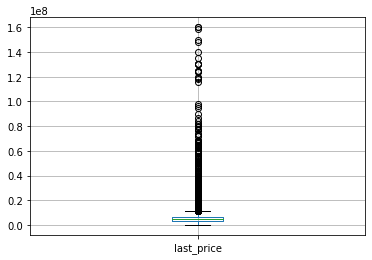

In [75]:
data.boxplot(column=['last_price'])

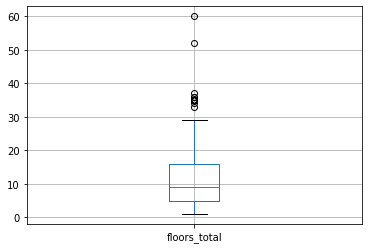

In [76]:
data.boxplot(column=['floors_total'])

In [77]:
data[data['floors_total'] > 40]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_per_metr,day,month,year,first_last_floor,living_total,kitchen_total
2253,12,3800000.0,45.5,2018-06-28,2,2.88,60,27.4,4,False,...,3.0,614.0,166.0,83516,3,6,2018,другой,0.602198,0.162637
16731,9,3978000.0,40.0,2018-09-24,1,2.65,52,10.5,18,False,...,0.0,NaN,45.0,99450,0,9,2018,другой,0.262500,0.350000


In [78]:
data = data[data['floors_total'] < 40]

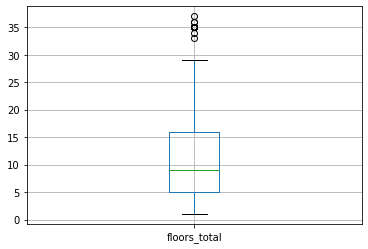

In [79]:
data.boxplot(column=['floors_total'])

Вывод: убрали выбивающиеся значения.

#### 4.4 Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от площади, числа комнат, удалённости от центра. Изучите зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. Также изучите зависимость от даты размещения: дня недели, месяца и года.


Посчитаем корреляцию Пирсона:

In [80]:
data['last_price'].corr(data['total_area'])

0.7210676497443659

In [81]:
data['last_price'].corr(data['rooms'])

0.4378235105100661

In [82]:
data['last_price'].corr(data['cityCenters_nearest'])

-0.2682280735210134

Сильная зависимость цены от площади и слабые зависимости цены от количества комнат и расположения.

In [83]:
data_first = data[data['first_last_floor'] == 'первый']
data_last = data[data['first_last_floor'] == 'последний']
data_other = data[data['first_last_floor'] == 'другой']
print(data_first['price_per_metr'].mean())
print(data_last['price_per_metr'].mean())
print(data_other['price_per_metr'].mean())

80350.28112286412
90472.52301105957
101481.05924013768


Средняя цена за метр, самая низкая в квартирах на первом этаже, чуть выше за квартиры на последнем этаже, и маскимальная в середине.

In [84]:
data['day'] = data['first_day_exposition'].dt.weekday
data['month'] = data['first_day_exposition'].dt.month
data['year'] = data['first_day_exposition'].dt.year

In [85]:
data['day'].corr(data['last_price'])

0.001455788856302616

In [86]:
data['month'].corr(data['last_price'])

0.011183256656991755

In [87]:
data['year'].corr(data['last_price'])

-0.07939428215154061

Никакой зависимости цены от даты размещения не обнаружено.

Вывод: Есть сильная зависимость от метража, слабая от количества комнат и расстояния от центра, цены за средный квадратный метр, меньше на первои и последних этажах и нет никакой зависимости от времени размещения.

Построим графики зависимостей цены от параметров:

In [88]:
def scatt(a,x_,y_,podp):
    a.plot(x=x_,y=y_,kind='scatter')
    plt.title(podp)
    plt.show();

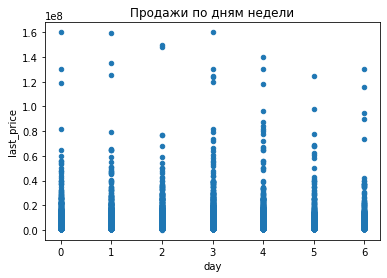

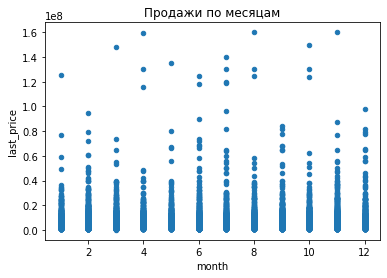

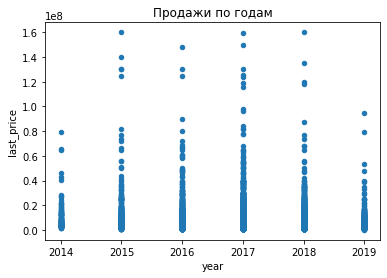

In [89]:
scatt(data,'day','last_price','Продажи по дням недели')
scatt(data,'month','last_price','Продажи по месяцам')
scatt(data,'year','last_price','Продажи по годам')

Вывод: По дням и месяцам особых предпочтений нет, по годам проседает 2014 год и выделяется 2017 год.

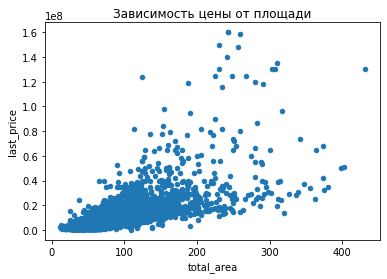

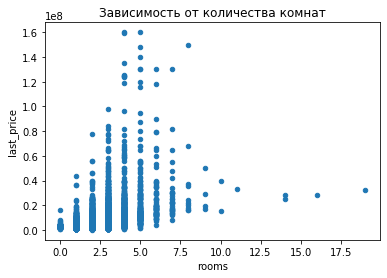

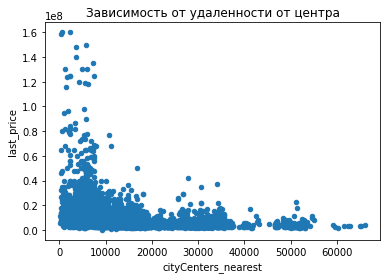

In [90]:
scatt(data,'total_area','last_price','Зависимость цены от площади')
scatt(data,'rooms','last_price','Зависимость от количества комнат')
scatt(data,'cityCenters_nearest','last_price','Зависимость от удаленности от центра')

Хорошо видны зависимости от количества комнат и площади, и весьма хорошо видна зависимость цены от удаленности от центра.

#### 4.5 Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите среди них населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце 'locality_name'.

In [91]:
data.groupby('locality_name').count()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_per_metr,day,month,year,first_last_floor,living_total,kitchen_total
locality_name,,,,,,,,,,,,,,,,,,,,,
Бокситогорск,14,14,14,14,14,14,14,14,14,14,...,0,0,14,14,14,14,14,14,14,14
Волосово,31,31,31,31,31,31,31,31,31,31,...,0,0,31,31,31,31,31,31,31,31
Волхов,85,85,85,85,85,85,85,85,85,85,...,0,0,85,85,85,85,85,85,85,85
Всеволожск,338,338,338,338,338,338,338,338,338,338,...,0,0,338,338,338,338,338,338,338,338
Выборг,208,208,208,208,208,208,208,208,208,208,...,0,0,208,208,208,208,208,208,208,208
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
село Путилово,2,2,2,2,2,2,2,2,2,2,...,0,0,2,2,2,2,2,2,2,2
село Рождествено,2,2,2,2,2,2,2,2,2,2,...,0,0,2,2,2,2,2,2,2,2
село Русско-Высоцкое,8,8,8,8,8,8,8,8,8,8,...,0,0,8,8,8,8,8,8,8,8


In [92]:
first10 = data['locality_name'].value_counts()[:10].index

In [93]:
data10 = data[data['locality_name'].isin(first10)]

In [94]:
data10.groupby('locality_name').mean().sort_values('price_per_metr')

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_metr,day,month,year,living_total,kitchen_total
locality_name,,,,,,,,,,,,,,,,,,,,,
Выборг,9.365385,3.050543e+06,53.995192,2.081731,2.679519,5.865385,32.872997,3.432692,0.009615,0.000000,...,NaN,NaN,NaN,177.375000,57084.153846,2.817308,6.235577,2017.197115,0.603087,0.168261
Гатчина,9.011236,3.378277e+06,50.154607,1.891386,2.637678,5.764045,29.432400,3.378277,0.000000,0.000000,...,NaN,NaN,NaN,189.696629,68141.471910,2.445693,6.161049,2017.131086,0.584459,0.168837
Всеволожск,10.011834,3.685125e+06,54.636183,1.875740,2.666686,8.393491,30.294310,4.573964,0.002959,0.011834,...,NaN,NaN,NaN,193.488166,68588.786982,2.529586,6.600592,2017.248521,0.545203,0.196907
Колпино,8.694805,3.910371e+06,52.931299,2.123377,2.625130,8.931818,31.661389,4.883117,0.003247,0.000000,...,485.123967,0.967427,530.888235,143.600649,74864.931818,2.512987,6.672078,2017.311688,0.591904,0.170302
посёлок Шушары,8.613300,4.048046e+06,53.541897,1.783251,2.646823,12.825123,28.964180,7.046798,0.000000,0.009852,...,NaN,0.347395,572.335714,156.541872,77898.160099,2.721675,6.514778,2017.219212,0.529297,0.210666
посёлок Мурино,8.723197,3.668050e+06,44.104191,1.397661,2.667602,19.658869,23.150821,10.830409,0.000000,0.035088,...,NaN,NaN,NaN,148.397661,85707.185185,2.477583,6.978558,2017.473684,0.521333,0.239382
посёлок Парголово,8.425249,4.393433e+06,50.872326,1.578073,2.640631,22.129568,25.246868,12.093023,0.000000,0.006645,...,501.100000,0.292359,589.137255,151.196013,89423.564784,2.627907,6.830565,2017.255814,0.480227,0.237974
деревня Кудрово,8.685619,4.234158e+06,46.571739,1.438127,2.680301,18.501672,24.189102,9.919732,0.000000,0.020067,...,NaN,NaN,NaN,180.872910,92473.086957,2.809365,6.414716,2016.916388,0.518930,0.237949
Пушкин,8.993443,6.174187e+06,59.609738,1.944262,2.676000,4.950820,33.421769,2.977049,0.000000,0.000000,...,403.134503,0.868852,474.344595,201.272131,102041.436066,2.429508,6.245902,2017.075410,0.559369,0.183553


Наибольшая средняя цена за метр у Санкт-Петербурга и Пушкина, наименьшая средняя цена за метр в Выборге и Всеволжске.

#### 4.6 Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге ('locality_name'). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона.


In [95]:
data_piter = data[data['locality_name'] == 'Санкт-Петербург']

In [96]:
data_piter

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_per_metr,day,month,year,first_last_floor,living_total,kitchen_total
2,10,5196000.0,56.00,2015-08-20,2,2.65,5,34.300000,4,False,...,2.0,574.0,558.0,92785,3,8,2015,другой,0.612500,0.148214
3,0,64900000.0,159.00,2015-07-24,3,2.65,14,89.826726,9,False,...,3.0,234.0,424.0,408176,4,7,2015,другой,0.564948,0.187324
4,2,10000000.0,100.00,2018-06-19,2,3.03,14,32.000000,13,False,...,1.0,48.0,121.0,100000,1,6,2018,другой,0.320000,0.410000
9,18,5400000.0,61.00,2017-02-26,3,2.50,9,43.600000,7,False,...,0.0,NaN,289.0,88524,6,2,2017,другой,0.714754,0.106557
10,5,5050000.0,39.60,2017-11-16,1,2.67,12,20.300000,3,False,...,2.0,553.0,137.0,127525,3,11,2017,другой,0.512626,0.214646
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23688,19,9200000.0,101.00,2019-04-01,3,3.05,15,63.000000,12,False,...,0.0,NaN,23.0,91089,0,4,2019,другой,0.623762,0.148515
23689,13,3550000.0,35.30,2018-02-28,1,2.86,15,16.300000,4,False,...,2.0,652.0,29.0,100566,2,2,2018,другой,0.461756,0.257790
23690,3,5500000.0,52.00,2018-07-19,2,2.65,5,31.000000,2,False,...,0.0,NaN,15.0,105769,3,7,2018,другой,0.596154,0.115385
23691,11,9470000.0,72.90,2016-10-13,2,2.75,25,40.300000,7,False,...,1.0,806.0,519.0,129903,3,10,2016,другой,0.552812,0.145405


In [97]:
data_piter['to_center_km'] = round(data_piter['cityCenters_nearest']/1000)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [98]:
data_piter

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,price_per_metr,day,month,year,first_last_floor,living_total,kitchen_total,to_center_km
2,10,5196000.0,56.00,2015-08-20,2,2.65,5,34.300000,4,False,...,574.0,558.0,92785,3,8,2015,другой,0.612500,0.148214,14.0
3,0,64900000.0,159.00,2015-07-24,3,2.65,14,89.826726,9,False,...,234.0,424.0,408176,4,7,2015,другой,0.564948,0.187324,7.0
4,2,10000000.0,100.00,2018-06-19,2,3.03,14,32.000000,13,False,...,48.0,121.0,100000,1,6,2018,другой,0.320000,0.410000,8.0
9,18,5400000.0,61.00,2017-02-26,3,2.50,9,43.600000,7,False,...,NaN,289.0,88524,6,2,2017,другой,0.714754,0.106557,15.0
10,5,5050000.0,39.60,2017-11-16,1,2.67,12,20.300000,3,False,...,553.0,137.0,127525,3,11,2017,другой,0.512626,0.214646,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23688,19,9200000.0,101.00,2019-04-01,3,3.05,15,63.000000,12,False,...,NaN,23.0,91089,0,4,2019,другой,0.623762,0.148515,14.0
23689,13,3550000.0,35.30,2018-02-28,1,2.86,15,16.300000,4,False,...,652.0,29.0,100566,2,2,2018,другой,0.461756,0.257790,16.0
23690,3,5500000.0,52.00,2018-07-19,2,2.65,5,31.000000,2,False,...,NaN,15.0,105769,3,7,2018,другой,0.596154,0.115385,6.0
23691,11,9470000.0,72.90,2016-10-13,2,2.75,25,40.300000,7,False,...,806.0,519.0,129903,3,10,2016,другой,0.552812,0.145405,4.0


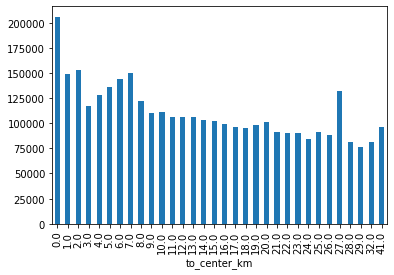

In [99]:
data_piter.groupby('to_center_km').mean()['price_per_metr'].plot(kind="bar")

Вывод: рост начинается в радиусе примерно двух километров от центра и резкий рывок в километровом радиусе.

**4.7 Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?**

In [100]:
data_piter_cen = data_piter[data_piter['to_center_km']<2]

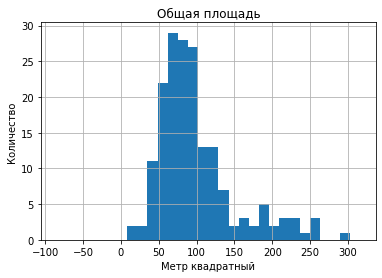

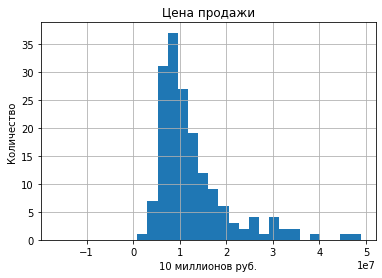

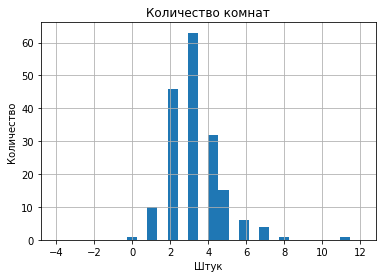

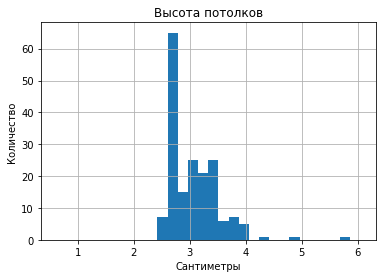

In [101]:
histogr(data_piter_cen['total_area'],'Метр квадратный','Количество','Общая площадь')
histogr(data_piter_cen['last_price'],'10 миллионов руб.','Количество','Цена продажи')
histogr(data_piter_cen['rooms'],'Штук','Количество','Количество комнат')
histogr(data_piter_cen['ceiling_height'],'Сантиметры','Количество','Высота потолков')

Вывод: большинство потолков от 2,5 до 3 метров, однако доля квартир с потолками высотой от 3 до примерно 3,7 тоже довольно высока.

In [102]:
data_piter_cen['last_price'].corr(data_piter_cen['rooms'])

0.4073653167572106

In [103]:
data_piter_cen['last_price'].corr(data_piter_cen['total_area'])

0.710585845202663

In [104]:
data_piter_cen['last_price'].corr(data_piter_cen['cityCenters_nearest'])

-0.14782455212051263

In [105]:
data_first_p = data_piter_cen[data_piter_cen['first_last_floor'] == 'первый']
data_last_p = data_piter_cen[data_piter_cen['first_last_floor'] == 'последний']
data_other_p = data_piter_cen[data_piter_cen['first_last_floor'] == 'другой']
print(data_first_p['price_per_metr'].mean())
print(data_last_p['price_per_metr'].mean())
print(data_other_p['price_per_metr'].mean())

129747.52173913043
150385.7619047619
161629.48245614034


In [106]:
data_piter_cen['year'].corr(data_piter_cen['last_price'])

0.033697779410505495

In [107]:
data_piter_cen['month'].corr(data_piter_cen['last_price'])

0.004707382386589804

In [108]:
data_piter_cen['day'].corr(data_piter_cen['last_price'])

-0.005609005365562012

Вывод: Средняя зависимость цены от площади, слабая от количества комнат и никакая от удаленности от центра(потому что это и есть центр), сильно дешевле средняя цена за метр на первых этажах, последний этаж чуть дешевле, чем средние. и опять же нет никакой зависимости от даты размещения.

Графики:

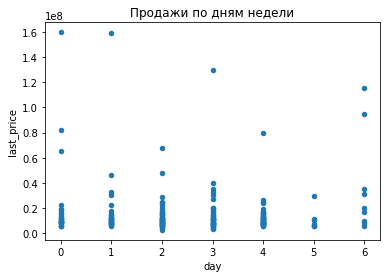

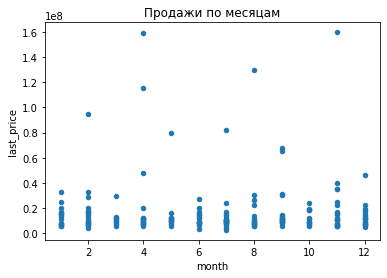

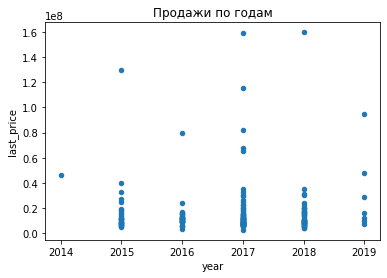

In [109]:
scatt(data_piter_cen,'day','last_price','Продажи по дням недели')
scatt(data_piter_cen,'month','last_price','Продажи по месяцам')
scatt(data_piter_cen,'year','last_price','Продажи по годам')

Вывод: не очень любят покупать квартиры по выходным, по  месяцам вроде ровно но возможно проседает лето, и на годовом графике хорошо виден "жирный" 2017 год, и нулевые продажи в "плохом" 2014 году.

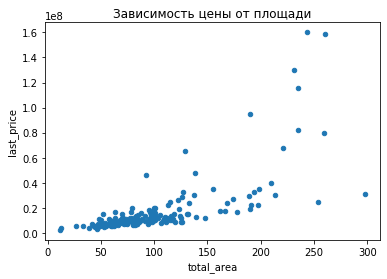

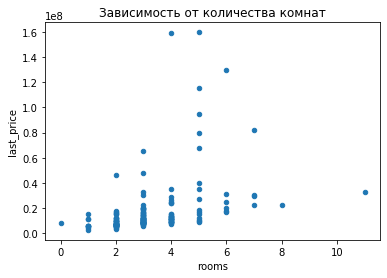

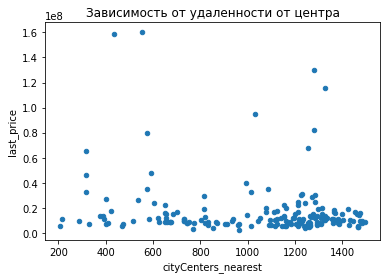

In [110]:
scatt(data_piter_cen,'total_area','last_price','Зависимость цены от площади')
scatt(data_piter_cen,'rooms','last_price','Зависимость от количества комнат')
scatt(data_piter_cen,'cityCenters_nearest','last_price','Зависимость от удаленности от центра')

Вывод: Хорошо видна зависимость цены от площади,прослеживается зависимость и от количества комнат и нет практически никакой от удаленности от центра.

### <a name="Step5"></a> Шаг 5. Общий вывод

[Наверх](#All)

    Были исследованы данные Яндекс.Недвижимости по размещению обьявлений о продаже недвижимости в Санкт-Петербурге и окресностях. Были обработаны пропуски в данных, добавлены в таблицу столбцы: цена квадратного метра, день недели, месяц и год публикации объявления, этаж квартиры; варианты — первый, последний, другой, соотношение жилой и общей площади, а также отношение площади кухни к общей. Построены гистограммы к каждому параметру.
    В данных отсутствует обширный кусок который собирался автоматически, возможно стоит попросить тех кто данные предоставил, что-то с этим сделать.
    Факторы влияющие на цену недвижимости - это тип этажа - крайний он или нет, площадь квартиры сильно влияет на ее стоимость, влиет на стоимость удаленность от центра и количество комнат.
    В центре Санкт-Петербурга, из факторов исчезает удаленность от центра, остальное немного меняется, последний этаж например уже не так сильно влияет на цену, зато первый влияет гораздо больше. 